In [1]:
import pandas as pd #For data manipulation
import numpy as np #Separating emotions
import glob #For file directories
import os
import soundfile #Creating sound files
import sys
import librosa #For audio analysis
import librosa.display
#import seaborn as sbn
import matplotlib.pyplot as plt #Plotting
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report #Showing emotion features
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from IPython.display import Audio

import scipy.io.wavfile
from scipy.fftpack import dct

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [12]:
import librosa
import numpy as np
import soundfile as sf

clean_signals = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
destination_noise = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/"
files = os.listdir(clean_signals)
for file in files:
    # Load the audio file
    audio_file, sr = librosa.load(clean_signals + file, sr=None)

    # Generate white noise with the same length as the audio signal
    noise = np.random.randn(len(audio_file))

    # Set the noise amplitude to 0.5 (adjust as needed)
    amplitude = 0.03
    noise = amplitude * noise

    # Add the noise to the audio signal
    audio_file_with_noise = audio_file + noise

    # Save the augmented audio file
    sf.write(os.path.join(destination_noise, file), audio_file_with_noise, sr)

In [5]:
import librosa
import os
import numpy as np
import soundfile as sf 

# Set the paths to the source and destination folders
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
destination_pitch = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentPitch_Shortened_Cropped/"
destination_stretch = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentStretch_Shortened_Cropped/"

# Get a list of all the files in the source folder
files = os.listdir(home)

for file in files:
    # Load the audio file
    audio_file, sr = librosa.load(home + file, sr=None)
    
    # Shift pitch by half an octave
    audio_file_pitch_shifted = librosa.effects.pitch_shift(audio_file, sr, n_steps=3)

    # Stretch audio file by a factor of 1.5
    audio_file_stretched = librosa.effects.time_stretch(audio_file, rate=1.5)
    
    # Save augmented audio files in their respective folders
    sf.write(os.path.join(destination_pitch, file), audio_file_pitch_shifted, sr)
    sf.write(os.path.join(destination_stretch, file), audio_file_stretched, sr)


Text(0.5, 1.0, 'RAVDESS Anger: Pitch Augmented')

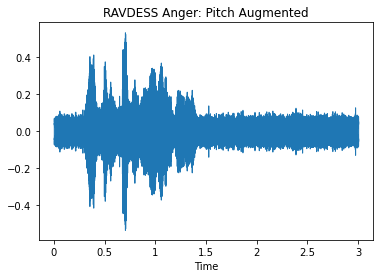

In [61]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Pitch Augmented")


Text(0.5, 1.0, 'RAVDESS Anger: Stretch Augmented')

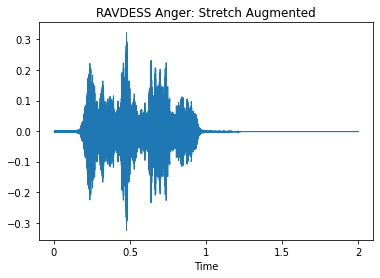

In [8]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentStretch_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Stretch Augmented")


Text(0.5, 1.0, 'RAVDESS Anger: Noise Augmented')

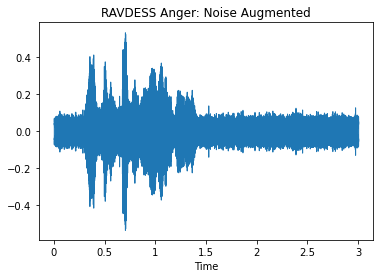

In [13]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Noise Augmented")


In [63]:
import librosa
from os import listdir
from os.path import isfile, join
data = []
label = []
#Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentPitch_Shortened_Cropped/"
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/"
#Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentStretch_Shortened_Cropped/"
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

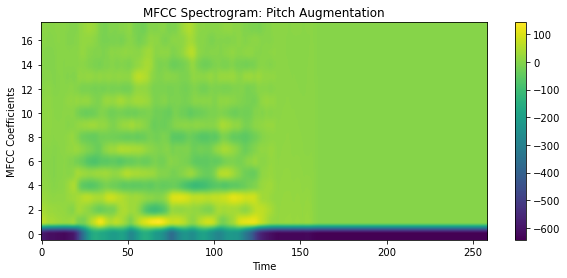

In [26]:
import librosa
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Display the first MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[0], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Pitch Augmentation')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

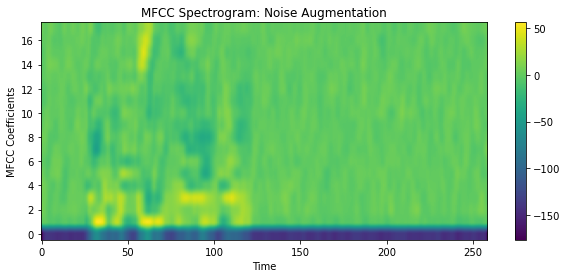

In [16]:
import librosa
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Display the first MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[0], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Noise Augmentation')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

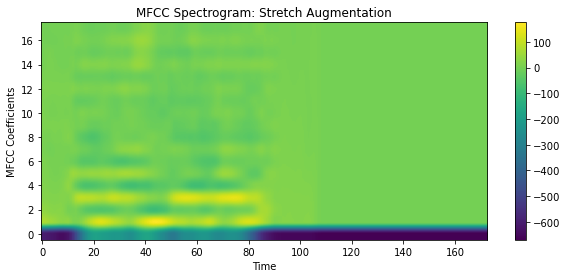

In [37]:
import librosa
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# Display the first MFCC on a spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(data[0], origin='lower', aspect='auto')
plt.colorbar()
plt.title('MFCC Spectrogram: Stretch Augmentation')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [64]:
data = np.array(data)
data.shape

(992, 18, 259)

In [65]:
X = np.expand_dims(data, axis=3)
X.shape

(992, 18, 259, 1)

In [66]:
label_new = []
for i in range(len(label)):
    if label[i] == 'n': #Neutral
        x=3
    elif label[i] == 'h': #Happy
        x=0
    elif label[i] == 's': #S
        x=1
    elif label[i] == 'a': #Angry
        x = 2
    label_new.append(x)

print(label_new)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [67]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [69]:
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(X_train.shape)

(793, 18, 259, 1)


In [70]:
# This model gives 62% with 30 mfccs, 75.6% for 18 mfccs
# change epochs from 20 - 24
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 259, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 18, 259, 64)       640       
                                                                 
 batch_normalization_30 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 259, 64)       36928     
                                                                 
 batch_normalization_31 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 129, 64)       0         
 g2D)                                                            
                                                      

In [71]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs=20 , verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
25/25 [==============================] - 232s 8s/step - loss: 1.5028 - accuracy: 0.4237 - val_loss: 7.6459 - val_accuracy: 0.3116
Epoch 2/20
25/25 [==============================] - 198s 8s/step - loss: 1.0091 - accuracy: 0.5977 - val_loss: 6.6671 - val_accuracy: 0.2864
Epoch 3/20
25/25 [==============================] - 181s 7s/step - loss: 0.7112 - accuracy: 0.7074 - val_loss: 3.5687 - val_accuracy: 0.3015
Epoch 4/20
25/25 [==============================] - 173s 7s/step - loss: 0.6440 - accuracy: 0.7604 - val_loss: 3.1230 - val_accuracy: 0.3518
Epoch 5/20
25/25 [==============================] - 174s 7s/step - loss: 0.4141 - accuracy: 0.8474 - val_loss: 1.9881 - val_accuracy: 0.4322
Epoch 6/20
25/25 [==============================] - 172s 7s/step - loss: 0.3095 - accuracy: 0.8852 - val_loss: 1.6430 - val_accuracy: 0.5427
Epoch 7/20
25/25 [==============================] - 172s 7s/step - loss: 0.2352 - accuracy: 0.9218 - val_loss: 1.3560 - val_accuracy: 0.5628
Epoch 8/20
25

In [72]:
# Calculate precision and recall
# Get the predicted probabilities for the validation set
y_pred_proba = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute precision and recall using scikit-learn metrics
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)


7/7 [==============================] - 12s 1s/step
Precision: 0.5913790831313226
Recall: 0.5879396984924623
